In [1]:
!pip install researchpy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from statistics import mean, stdev

sns.set()
plt.set_cmap('tab10')

<Figure size 432x288 with 0 Axes>

In [3]:
sklearn_results = pd.read_csv('./drive/MyDrive/compsci/sklearn_results.csv')
cnn_results = pd.read_csv('./drive/MyDrive/compsci/cnn_results.csv')
cnn_results = cnn_results.transpose()
lstm_results = pd.read_csv('./drive/MyDrive/compsci/lstm_results.csv')
lstm_results = lstm_results.transpose()

sklearn_cv_results = pd.read_csv('./drive/MyDrive/compsci/sklearn_cv_results.csv')
keras_cv_results = pd.read_csv('./drive/MyDrive/compsci/keras_cv_results.csv')

In [4]:
sklearn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
cnn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
lstm_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']

sklearn_cv_results.columns = ['Model','Acc_Mean','Acc_Std','Pre_Mean','Pre_Std','Rec_Mean','Rec_Std','F1_Mean','F1_Std']
keras_cv_results.columns = ['Model','Acc_Mean','Acc_Std','Pre_Mean','Pre_Std','Rec_Mean','Rec_Std','F1_Mean','F1_Std']

In [5]:
frames = [sklearn_results,lstm_results,cnn_results]
all_results = pd.concat(frames, ignore_index=True)
all_results = all_results.drop(columns=['Conf Matrice'])
print(all_results)
print('')
cv_frames = [sklearn_cv_results,keras_cv_results]
all_cv_results = pd.concat(cv_frames, ignore_index=True)
print(all_cv_results)

   Model Accuracy Precision Recall F1score
0    GBC    0.908     0.953  0.908   0.923
1    ADA    0.277     0.807  0.277    0.35
2    RFC    0.903     0.949  0.903   0.919
3     NB    0.409     0.842  0.409   0.489
4  NNMLP    0.945     0.967  0.945   0.952
5    SVC    0.941     0.969  0.941   0.951
6   LSTM    0.926     0.965  0.926    0.94
7    CNN    0.954     0.972  0.954    0.96

   Model  Acc_Mean  Acc_Std  Pre_Mean  ...  Rec_Mean  Rec_Std  F1_Mean  F1_Std
0    ADA     0.498    0.231     0.356  ...     0.422    0.053    0.309   0.045
1    RFC     0.911    0.005     0.690  ...     0.918    0.002    0.757   0.008
2     NB     0.397    0.005     0.368  ...     0.600    0.005    0.347   0.002
3  NNMLP     0.944    0.007     0.769  ...     0.949    0.007    0.828   0.013
4    SVC     0.947    0.004     0.775  ...     0.954    0.005    0.827   0.008
5   LSTM     0.937    0.006     0.766  ...     0.948    0.007    0.821   0.016
6    CNN     0.950    0.010     0.796  ...     0.958    0.0

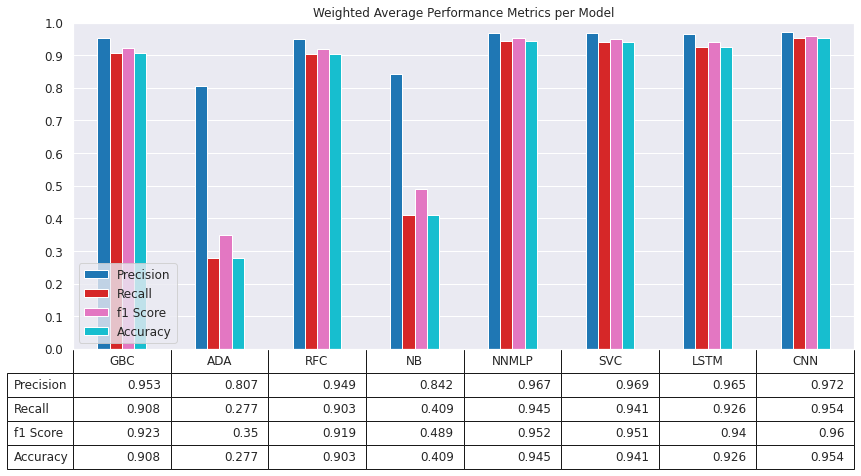

In [6]:
accuracy =  round(all_results['Accuracy'].astype(float),3).to_numpy()
precision = round(all_results['Precision'].astype(float),3).to_numpy()
recall =    round(all_results['Recall'].astype(float),3).to_numpy()
f1_score =  round(all_results['F1score'].astype(float),3).to_numpy()
index = all_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_res = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score,
                   'Accuracy':accuracy
                  },
                  index=index)
ax = df_res.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

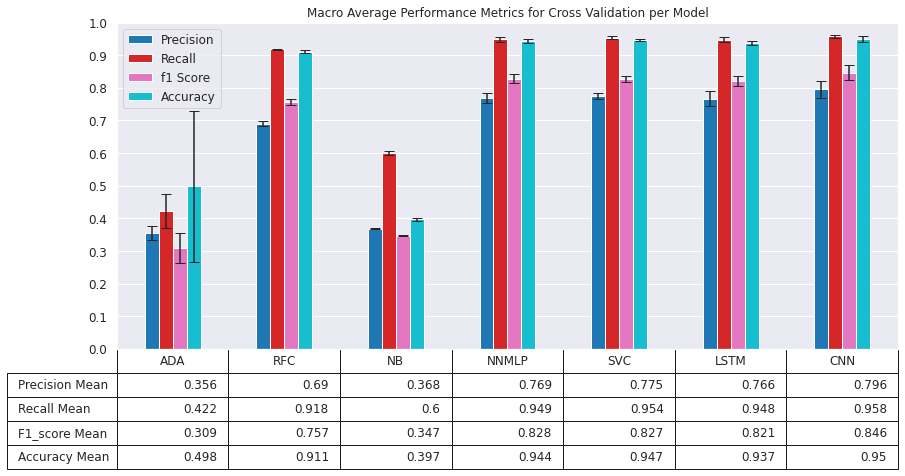

In [7]:
accuracyM =  round(all_cv_results['Acc_Mean'].astype(float),3).to_numpy()
accuracyS =  round(all_cv_results['Acc_Std'].astype(float),3).to_numpy()

precisionM = round(all_cv_results['Pre_Mean'].astype(float),3).to_numpy()
precisionS = round(all_cv_results['Pre_Std'].astype(float),3).to_numpy()

recallM =    round(all_cv_results['Rec_Mean'].astype(float),3).to_numpy()
recallS =    round(all_cv_results['Rec_Std'].astype(float),3).to_numpy()

f1_scoreM =  round(all_cv_results['F1_Mean'].astype(float),3).to_numpy()
f1_scoreS =  round(all_cv_results['F1_Std'].astype(float),3).to_numpy()

index = all_cv_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_cv = pd.DataFrame({'Precision Mean':precisionM,
                       'Recall Mean':recallM,
                       'F1_score Mean':f1_scoreM,
                       'Accuracy Mean':accuracyM,
                      # 'Precision Std':precisionS,
                      # 'Recall Std':recallS,                   
                      # 'F1_score Std':f1_scoreS,                   
                      # 'Accuracy Std':accuracyS
                       },index=index)

error = [precisionS,recallS,f1_scoreS,accuracyS]

ax = df_cv.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            yerr=error,
            capsize=5,
            table=True,
            title=('Macro Average Performance Metrics for Cross Validation per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=2, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [8]:
import researchpy as rp
rp.summary_cont(df_cv)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision Mean,7.0,0.6457,0.1966,0.0743,0.4639,0.8276
1,Recall Mean,7.0,0.8213,0.2185,0.0826,0.6192,1.0234
2,F1_score Mean,7.0,0.6764,0.2399,0.0907,0.4546,0.8983
3,Accuracy Mean,7.0,0.7977,0.2414,0.0912,0.5745,1.0209


In [9]:
stack_df = df_cv.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,Model,metric,score
0,ADA,Precision Mean,0.356
1,ADA,Recall Mean,0.422
2,ADA,F1_score Mean,0.309
3,ADA,Accuracy Mean,0.498
4,RFC,Precision Mean,0.690
5,RFC,Recall Mean,0.918
6,RFC,F1_score Mean,0.757
7,RFC,Accuracy Mean,0.911
8,NB,Precision Mean,0.368
9,NB,Recall Mean,0.600


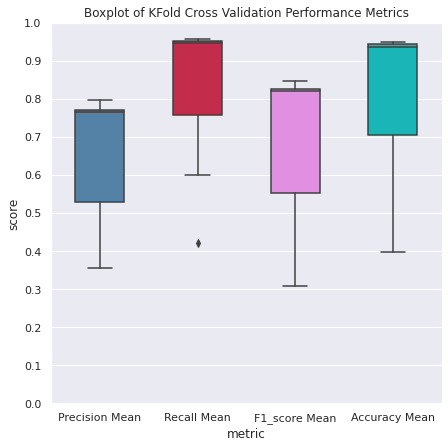

In [10]:
plt.figure(figsize=(7,7))
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5, palette=mypal)
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [11]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df_cv:
    col_values = df_cv[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df_cv.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.07432064197199356 or s/np.sqrt(n_t) 0.06880754416567116 0.1820476501874592
sample_standard_error s^2= 0.08258061408786721 or s/np.sqrt(n_t) 0.07645479237410778 0.20228036716096673
sample_standard_error s^2= 0.0906746820186521 or s/np.sqrt(n_t) 0.08394844315335287 0.22210670353481463
sample_standard_error s^2= 0.09122335600202454 or s/np.sqrt(n_t) 0.08445641655538133 0.22345067482921738


,metric,mean,std error,CI
0,Precision Mean,0.645714,0.0743206,"(0.46, 0.83)"
2,F1_score Mean,0.676429,0.0906747,"(0.45, 0.9)"
3,Accuracy Mean,0.797714,0.0912234,"(0.57, 1.02)"
1,Recall Mean,0.821286,0.0825806,"(0.62, 1.02)"


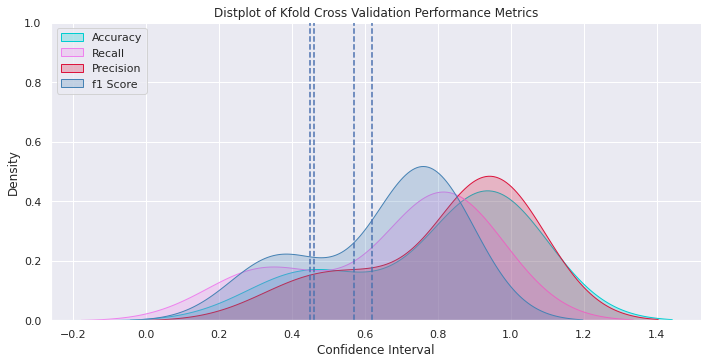

In [12]:
mypal1=('#4682B4','#DC143C','#EE82EE','#00CED1')
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=False,palette=mypal1)
plt.title('Distplot of Kfold Cross Validation Performance Metrics')
plt.ylim(0,1)
plt.xlabel('Confidence Interval')
graph.ax.legend(labels=['Accuracy','Recall','Precision','f1 Score'],loc=2)
for CI in CI_df['CI'].values:
    plt.axvline(CI[0],  linestyle='--')
plt.show()

In [14]:
ADA_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/ada_acc.csv') 
ADA_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/ada_pre.csv') 
ADA_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/ada_rec.csv') 
ADA_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/ada_f1s.csv') 

RFC_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/RFC_acc.csv') 
RFC_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/RFC_pre.csv') 
RFC_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/RFC_rec.csv') 
RFC_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/RFC_f1s.csv') 

NB_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NB_acc.csv') 
NB_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NB_pre.csv') 
NB_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NB_rec.csv') 
NB_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NB_f1s.csv') 

NNMLP_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NNMLP_acc.csv') 
NNMLP_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NNMLP_pre.csv') 
NNMLP_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NNMLP_rec.csv') 
NNMLP_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/NNMLP_f1s.csv') 

SVC_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/SVC_acc.csv') 
SVC_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/SVC_pre.csv') 
SVC_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/SVC_rec.csv') 
SVC_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/SVC_f1s.csv') 

LSTM_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/LSTM_acc.csv') 
LSTM_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/LSTM_pre.csv') 
LSTM_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/LSTM_rec.csv') 
LSTM_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/LSTM_f1s.csv') 

CNN_acc = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/CNN_acc.csv') 
CNN_pre = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/CNN_pre.csv') 
CNN_rec = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/CNN_rec.csv') 
CNN_f1s = pd.read_csv('./drive/MyDrive/compsci/all_cv_data/CNN_f1s.csv') 

In [34]:
from scipy.stats import *
norm_data = [ADA_acc,ADA_pre,ADA_rec,ADA_f1s,
             RFC_acc,RFC_pre,RFC_rec,RFC_f1s,
             NB_acc,NB_pre,NB_rec,NB_f1s,
             NNMLP_acc,NNMLP_pre,NNMLP_rec,NNMLP_f1s,
             SVC_acc,SVC_pre,SVC_rec,SVC_f1s,
             LSTM_acc,LSTM_pre,LSTM_rec,LSTM_f1s,
             CNN_acc,CNN_pre,CNN_rec,CNN_f1s]

for i in norm_data:
  print(shapiro(i))

(0.8342933058738708, 0.1168350800871849)
(0.9827239513397217, 0.9642691612243652)
(0.8973435163497925, 0.3584659695625305)
(0.8253911733627319, 0.09820254892110825)
(0.9240466356277466, 0.534972071647644)
(0.8713908195495605, 0.23180556297302246)
(0.9167619943618774, 0.4823513329029083)
(0.9242209196090698, 0.536267876625061)
(0.7432104349136353, 0.017080264165997505)
(0.8968038558959961, 0.35538291931152344)
(0.8923196196556091, 0.3305204510688782)
(0.9386249780654907, 0.6481403708457947)
(0.910325288772583, 0.4385402202606201)
(0.8932203054428101, 0.3354058265686035)
(0.9435039758682251, 0.6875402927398682)
(0.8851320743560791, 0.29346218705177307)
(0.996569812297821, 0.9991128444671631)
(0.9204292297363281, 0.5084580779075623)
(0.956440269947052, 0.7919295430183411)
(0.9514926671981812, 0.7523523569107056)
(0.8539392352104187, 0.1693224459886551)
(0.6491469144821167, 0.0017211745725944638)
(0.9895051717758179, 0.9879330992698669)
(0.7097445726394653, 0.007817775942385197)
(0.9058182

In [35]:
from scipy.stats import *

# Perform one-way ANOVA.

f_acc_stat, f_acc_p = f_oneway(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc)
f_pre_stat, f_pre_p = f_oneway(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre)
f_rec_stat, f_rec_p = f_oneway(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec)
f_f1s_stat, f_f1s_p = f_oneway(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s)

print('Accuracy: ', f_oneway(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc))
print('Precision: ', f_oneway(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre))
print('Recall: ', f_oneway(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec))
print('F1Score: ', f_oneway(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s))

Accuracy:  F_onewayResult(statistic=array([45.71885281]), pvalue=array([3.95440302e-15]))
Precision:  F_onewayResult(statistic=array([805.19364508]), pvalue=array([5.56765966e-36]))
Recall:  F_onewayResult(statistic=array([675.10862742]), pvalue=array([1.18365827e-34]))
F1Score:  F_onewayResult(statistic=array([789.71332871]), pvalue=array([7.79876166e-36]))


In [36]:
k_acc_stat, k_acc_p = kruskal(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc)
k_pre_stat, k_pre_p = kruskal(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre)
k_rec_stat, k_rec_p = kruskal(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec)
k_f1s_stat, k_f1s_p = kruskal(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s)

print('Accuracy: ', kruskal(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc))
print('Precision: ', kruskal(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre))
print('Recall: ', kruskal(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec))
print('F1Score: ', kruskal(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s))

Accuracy:  KruskalResult(statistic=34.70431893687709, pvalue=4.9168255806687885e-06)
Precision:  KruskalResult(statistic=34.78626799557034, pvalue=4.740467676221077e-06)
Recall:  KruskalResult(statistic=35.87153931339978, pvalue=2.9197096075386265e-06)
F1Score:  KruskalResult(statistic=34.810631229235895, pvalue=4.6892582982034195e-06)


In [64]:
kruskal_data = [k_acc_p, k_pre_p, k_rec_p, k_f1s_p]
anova_data = [f_acc_p, f_pre_p, f_rec_p, f_f1s_p]
metrics = ['Accuracy','Precision','Recall','F1 Score']

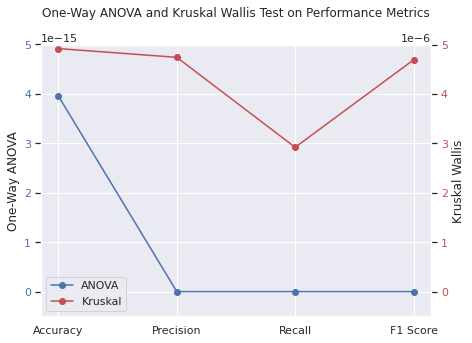

In [85]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(metrics, anova_data, 'b-', marker='o', label='ANOVA')
ax1.set_ylabel('One-Way ANOVA')
ax1.set_ylim(-5e-16,5e-15)
ax1.set_title('One-Way ANOVA and Kruskal Wallis Test on Performance Metrics', y=1.08)

ax2 = ax1.twinx()
lns2 = ax2.plot(metrics, kruskal_data, 'r-', marker='o', label='Kruskal')
ax2.set_ylabel('Kruskal Wallis')
ax2.set_ylim(-5e-7,5e-6)
ax2.grid(False)

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

for tl in ax2.get_yticklabels():
    tl.set_color('r')
for tl in ax1.get_yticklabels():
    tl.set_color('b')